### Imports

In [107]:
import math
import matplotlib.pyplot as plt
import time
from statistics import mean
from sympy import sqrt
from IPython.display import display, Math
from collections import defaultdict
import json

In [135]:
statistics = defaultdict(lambda: [])

### Methods

In [108]:
def isPrimeSqrt(num):
    for i in range(2,int(math.sqrt(num))-1):
        if num % i == 0:
            return False
    return True

def isPrime(num):
    for i in range(2,num):
        if num % i == 0:
            return False
    return True

# Main

## Definitions

In [162]:
methods = [isPrime,isPrimeSqrt]
dont_update = [isPrime]
prime_number_amount = 19
MAX_SECONDS = 100



prime_numbers = [
        11,
        101,
        1009,
        10007,
        100003,
        1000003,
        10000019,
        100000007,
        1000000007,
        10000000019,
        100000000003,
        1000000000039,
        10000000000037,
        100000000000031,
        1000000000000037,
        10000000000000061,
        100000000000000003,
        1000000000000000003,
        10000000000000000051,
        100000000000000000039,
        1000000000000000000117,
        10000000000000000000009,
        100000000000000000000117,
        1000000000000000000000007,
        10000000000000000000000013,
        100000000000000000000000067,
        1000000000000000000000000103,
        10000000000000000000000000331,
        100000000000000000000000000319]





## Processing

In [163]:
update = list(set(methods)-set(dont_update))

print(update)

for method in update:
  if method.__name__ in statistics:
    del statistics[method.__name__]
start_time = time.time()
global_time = time.time()



for prime_func in update:
  print(prime_func.__name__)
  statistics[prime_func.__name__].append([])
  for i,number in enumerate(prime_numbers[:prime_number_amount]):
    start_time = time.time()
    prime_func(number)
    t = round(time.time()-start_time,10)
    statistics[prime_func.__name__][0].append(t)

    print(f"[{i}] {number}: {t: .2f}s")

    if t > MAX_SECONDS:
      break

  times = statistics[prime_func.__name__][0]
  statistics[prime_func.__name__].append([])
  for i in range(len(times)-1):
    if times[i+1] > 0 and times[i] > 0:
      statistics[prime_func.__name__][1].append(times[i+1]/times[i])


f"execution time: {round(time.time()-global_time,2)}s"
  

[<function isPrime at 0x000001305A6D3100>, <function isPrimeSqrt at 0x000001305A6D32E0>]
isPrime
[0] 11:  0.00s
[1] 101:  0.00s
[2] 1009:  0.00s
[3] 10007:  0.00s
[4] 100003:  0.01s
[5] 1000003:  0.06s
[6] 10000019:  0.59s
[7] 100000007:  6.19s
[8] 1000000007:  55.46s
[9] 10000000019:  1790.59s
isPrimeSqrt
[0] 11:  0.00s
[1] 101:  0.00s
[2] 1009:  0.00s
[3] 10007:  0.00s
[4] 100003:  0.00s
[5] 1000003:  0.00s
[6] 10000019:  0.00s
[7] 100000007:  0.00s
[8] 1000000007:  0.00s
[9] 10000000019:  0.01s
[10] 100000000003:  0.02s
[11] 1000000000039:  0.06s
[12] 10000000000037:  0.20s
[13] 100000000000031:  0.64s
[14] 1000000000000037:  2.04s
[15] 10000000000000061:  6.48s
[16] 100000000000000003:  20.47s
[17] 1000000000000000003:  64.85s
[18] 10000000000000000051:  552.75s


'execution time: 2500.42s'

In [164]:
for key, sublists in statistics.items():
    print(f'{key}:')
    for sublist in sublists:
        print(sublist)

isPrime:
[0.0, 0.0, 0.0, 0.0, 0.0060055256, 0.0600543022, 0.5915384293, 6.1896464825, 55.456479311, 1790.5907154083]
[9.999841179596338, 9.850059156960782, 10.463642218181073, 8.959555197181652, 32.28821478851308]
isPrimeSqrt:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010004044, 0.0020027161, 0.0060083866, 0.0210156441, 0.0640583038, 0.2001819611, 0.6400876045, 2.038674593, 6.4799647331, 20.4675841331, 64.8469727039, 552.7497508526]
[2.0019065289996725, 3.000118988407793, 3.497718355872773, 3.0481246967824314, 3.124996280341722, 3.1975288931266244, 3.184993083239749, 3.1785184135563513, 3.1585949887274087, 3.1682768362989178, 8.523909872809787]


## Visualization

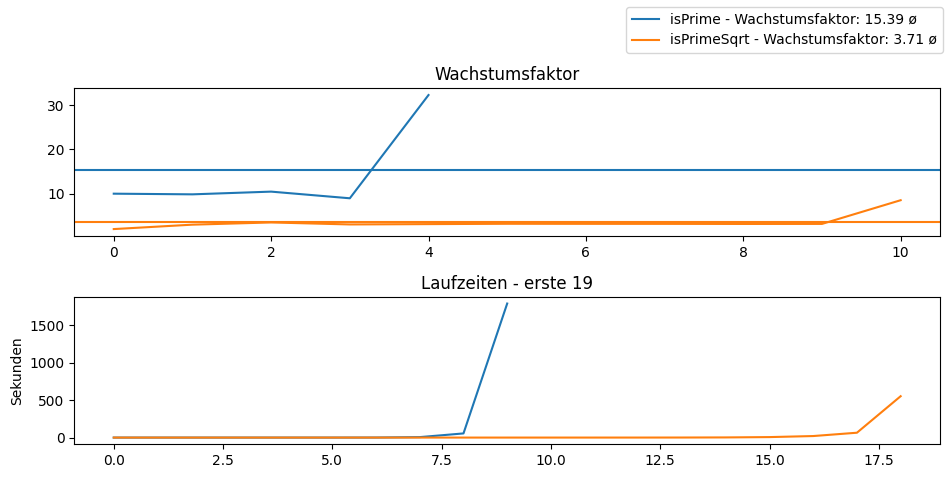

<IPython.core.display.Math object>

In [165]:
fig,a = plt.subplots(2)


for method_name, values in statistics.items():
    a[1].plot(values[0])
    lines = a[0].plot(values[1])

    fac = mean(values[1][1:])
    a[0].axhline(fac,color=lines[0].get_color(),label=f"{method_name} - Wachstumsfaktor: {round(fac, 2)} \u00F8")


a[1].set_title(f"Laufzeiten - erste {prime_number_amount}")
a[1].set_ylabel("Sekunden")


a[0].set_title(f"Wachstumsfaktor")



fig.tight_layout(rect=[0, 0, 1.5, 0.9])
fig.legend()


plt.show()

print()
display(Math(r'\sqrt{10} = ' + f'{sqrt(10).evalf():.4f}'))
